# Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

from sklearn.datasets import fetch_openml

# Transformation Matrices

In [10]:
def scale_matrix(sx, sy):
    return np.array([[sx, 0], [0, sy]])

def rotation_matrix(theta):
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

def shear_matrix_horizontal(sh):
    return np.array([[1, sh], [0, 1]])

def shear_matrix_vertical(sv):
    return np.array([[1, 0], [sv, 1]])

# Load Image

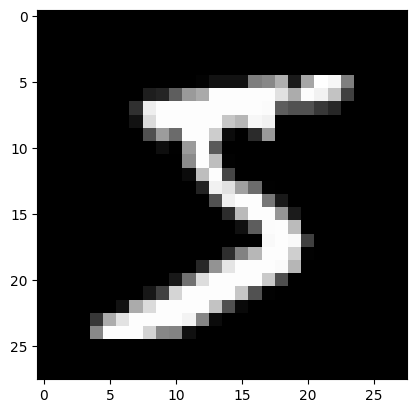

In [ ]:
# Get an image from the famouse MNIST dataset.

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X, y = mnist.data, mnist.target

# Get a specific digit
digit_indices = np.where(y == '5')[0]
first_five = X[digit_indices[0]].reshape(28, 28)

plt.imshow(first_five, cmap='gray')
plt.show()

# Apply Transformations

### Convert to coordinates so that it can be multiplied

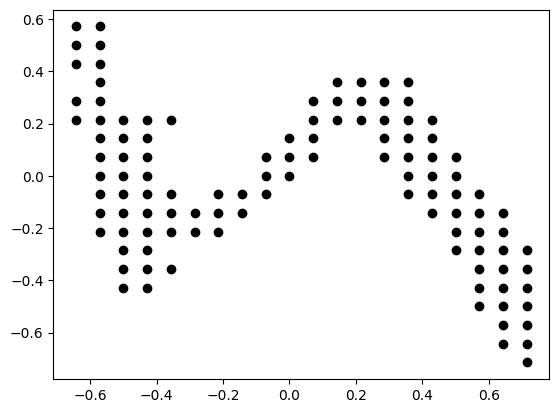

In [26]:
# Convert Image to Coordinates in order to apply transformations.

def image_to_coords(image, threshold=128):
    coords = np.column_stack(np.where(image > threshold))
    coords = (coords - 14) / 14
    return coords

digit_coords = image_to_coords(first_five)
plt.scatter(digit_coords[:, 0], digit_coords[:, 1], c='black')
plt.show()

### Scaling

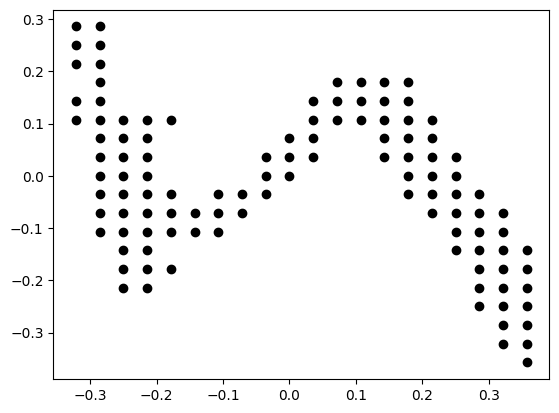

In [31]:
# Scale the 5 by 0.5 in both x and y directions.
scaled_coords = scale_matrix(0.5, 0.5) @ digit_coords.T
plt.scatter(scaled_coords[0], scaled_coords[1], c='black')

plt.show()

### Rotation

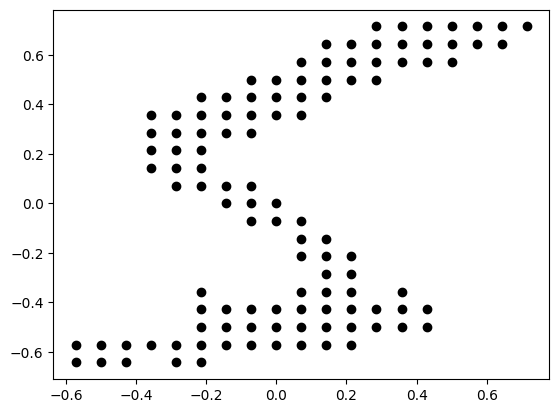

In [ ]:
# 90 Degree Rotation.
rotated_coords = rotation_matrix(np.pi / 2) @ digit_coords.T
plt.scatter(rotated_coords[0], rotated_coords[1], c='black')

plt.show()

### Horizontal Shearing

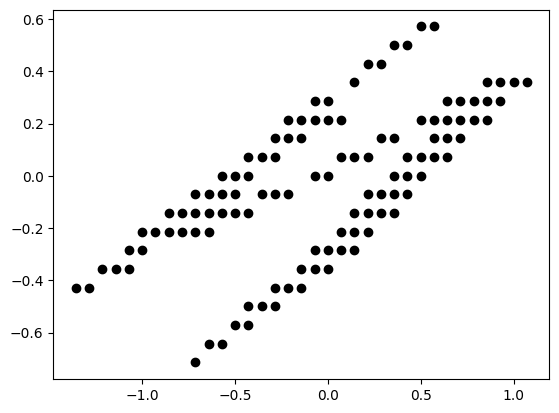

In [28]:
hori_sheared_coords = shear_matrix_horizontal(2) @ digit_coords.T
plt.scatter(hori_sheared_coords[0], hori_sheared_coords[1], c='black')

plt.show()

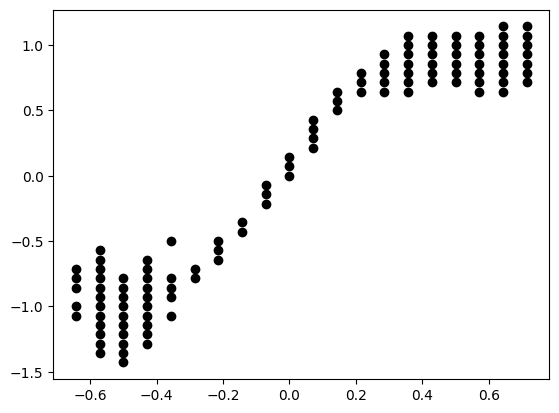

In [29]:
vert_sheared_coords = shear_matrix_vertical(2) @ digit_coords.T
plt.scatter(vert_sheared_coords[0], vert_sheared_coords[1], c='black')

plt.show()